## **Project:** Wine Quality - <span style="color:darkcyan">Modelling</span> <br> Mauro Cardoso

#### BUSINESS UNDERSTANDING / **PROJECT OBJECTIVE** »
- The aim of this analysis is to predict the quality of new wines without resorting to expert assessment. To this end, 6497 wines are registered, data from their respective chemical analyses, and the evaluation of experts. Using two datasets consisting on physicochemical data from red and white Vinho Verde wine samples, from the north of Portugal, and a quality classification, our client wants to build an application to automatically classify new samples of Vinho Verde.

The Wine Quality dataset contains information about various physicochemical properties of wines.
This dataset only has numeric variables:
    
| FEATURES | DESCRIPTION | VARIABLE TYPE
|:-------|:-------|:-------|
**fixed acidity:**| Influences the flavor of the wine. A significant reduction in acids can lead to wines that taste flat. Examples of fixed acids are tartaric, malic, citric, and succinic, which can be found in grapes (except succinic). It is measured in g/dm3.|Continuous numerical|
**volatile acidity:**| These acids must be distilled out from the wine before the end of the production process. Excess of volatile acids are undesirable and lead to unpleasant flavor. It is measured in g/dm3.|Continuous numerical|
**citric acid:**| The amount of citric acid in the wine, which most of it is usually consumed during the fermentation process. It acts as a preservative and small quantities can add freshness and flavor. It is measured in g/dm3.|Continuous numerical|
**residual sugar:**| The amount of sugar remaining after the end of the fermentation. The goal is to have a perfect balance between sweetness and sourness. Wines with more than 45g/dm3 are considered sweet. It is measured in g/dm3.|Continuous numerical|
**chlorides:**| The amount of salt in the wine.|Continuous numerical|
**free sulfur dioxide:**| The amount of sulfur dioxide (SO2) in free form. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. It is measured in g/dm3.|Continuous numerical|
**total sulfur dioxide:**| The total amount of SO2 in the wine. This is added to kill harmful bacteria and preserve quality and freshness. It is measured in mg/dm3.|Continuous numerical|
**density:**| It is used as a measure of the conversion of sugar to alcohol. Sweeter wines have higher density.|Continuous numerical|
**pH:**| Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).|Continuous numerical|
**sulphates:**| The amount of mineral salts containing sulfur in the wine. It is an additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. They are related to the fermentation process and affect the aroma and flavor of the wine.|Continuous numerical|
**alcohol:**| Alcohol is formed as a result of yeast converting sugar during the fermentation process. It's usually measured in % volume or alcohol by volume (ABV).|Continuous numerical|
**quality:**| A quality label in the range of 0 (very bad) to 10 (very excellent). It is the median of at least three evaluations made by wine experts.|Discrete numerical|

### Instals section:

In [1]:
!pip3 install imblearn

### Imports section:

In [2]:
import pandas as pd
import random as rd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.manifold import TSNE
from pathlib import Path

import pickle

pd.set_option('expand_frame_repr', False) # expand print function visualization
pd.set_option('display.max_columns', None) # expand/use all columns
#pd.options.display.float_format = '{:20,.2f}'.format # Withdrawal of scientific notation

In [3]:
root_marker = 'README.md'

current_dir = Path.cwd()

while not (current_dir / root_marker).exists() and current_dir != current_dir.parent:
    current_dir = current_dir.parent

csv_path = current_dir / 'data' / 'processed' / 'wine_clean.csv'

df = pd.read_csv(csv_path)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.reset_index(drop=True)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality   type  rlog_fixed_acidity  rlog_volatile_acidity  rlog_citric_acid  rlog_residual_sugar  rlog_chlorides  rlog_free_sulfur_dioxide  rlog_total_sulfur_dioxide  rlog_density   rlog_pH  rlog_sulphates  rlog_alcohol quality_class  quality_num_class  type_r2
0               7.0             0.270         0.36            20.7      0.045                 45.0                 170.0  1.00100  3.00       0.45      8.8        6  white            2.079442               0.239017          0.307485             3.077312        0.044017                  3.828641                   5.141664      0.693647  1.386294        0.371564      2.282382        medium                  1        0
1               6.3             0.300         0.34             1.6      0.049                 14.0                 132.0  0.99400  3.30       0.49      9.5        6  white            1.987874               0.262364          0.292670             0.955511        0.047837                  2.708050                   4.890349      0.690143  1.458615        0.398776      2.351375        medium                  1        0
2               8.1             0.280         0.40             6.9      0.050                 30.0                  97.0  0.99510  3.26       0.44     10.1        6  white            2.208274               0.246860          0.336472             2.066863        0.048790                  3.433987                   4.584967      0.690694  1.449269        0.364643      2.406945        medium                  1        0
3               7.2             0.230         0.32             8.5      0.058                 47.0                 186.0  0.99560  3.19       0.40      9.9        6  white            2.104134               0.207014          0.277632             2.251292        0.056380                  3.871201                   5.231109      0.690945  1.432701        0.336472      2.388763        medium                  1        0
4               7.2             0.230         0.32             8.5      0.058                 47.0                 186.0  0.99560  3.19       0.40      9.9        6  white            2.104134               0.207014          0.277632             2.251292        0.056380                  3.871201                   5.231109      0.690945  1.432701        0.336472      2.388763        medium                  1        0
...             ...               ...          ...             ...        ...                  ...                   ...      ...   ...        ...      ...      ...    ...                 ...                    ...               ...                  ...             ...                       ...                        ...           ...       ...             ...           ...           ...                ...      ...
6492            6.2             0.600         0.08             2.0      0.090                 32.0                  44.0  0.99490  3.45       0.58     10.5        5    red            1.974081               0.470004          0.076961             1.098612        0.086178                  3.496508                   3.806662      0.690594  1.492904        0.457425      2.442347        medium                  1        1
6493            5.9             0.550         0.10             2.2      0.062                 39.0                  51.0  0.99512  3.52       0.76     11.2        6    red            1.931521               0.438255          0.095310             1.163151        0.060154                  3.688879                   3.951244      0.690704  1.508512        0.565314      2.501436        medium                  1        1
6494            6.3             0.510         0.13             2.3      0.076                 29.0                  40.0  0.99574  3.42       0.75     11.0        6    red            1.987874               0.412110          0.122218   

### Feature selection:

Some of the features reveled as not relevant for this proposal. Removing 'quality_num_class' could also help reveal clearer patterns, as this column could be introducing bias into the cluster analysis:

In [4]:
df_orig = df.copy()
df_orig.drop(columns=['rlog_fixed_acidity','rlog_volatile_acidity','rlog_citric_acid','rlog_residual_sugar','rlog_chlorides',
                     'rlog_free_sulfur_dioxide','rlog_total_sulfur_dioxide','rlog_density',
                     'rlog_pH','rlog_sulphates','rlog_alcohol','quality_class','type', 'quality_num_class'], inplace = True)

df_log = df.copy()
df_log.drop(columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',
                     'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates',
                     'alcohol','quality_class','type','quality_num_class'], inplace = True)


In [5]:
df_orig.corr()[['quality']].sort_values(by='quality', ascending = False)

quality
quality               1.000000
alcohol               0.444319
citric_acid           0.085532
free_sulfur_dioxide   0.055463
sulphates             0.038485
pH                    0.019506
residual_sugar       -0.036980
total_sulfur_dioxide -0.041385
fixed_acidity        -0.076743
type_r2              -0.119323
chlorides            -0.200666
volatile_acidity     -0.265699
density              -0.305858

In [6]:
df_log.corr()[['quality']].sort_values(by='quality', ascending = False)

quality
quality                    1.000000
rlog_alcohol               0.440933
rlog_free_sulfur_dioxide   0.112191
rlog_citric_acid           0.100735
rlog_sulphates             0.036438
rlog_pH                    0.020208
rlog_total_sulfur_dioxide  0.008780
rlog_residual_sugar       -0.018857
rlog_fixed_acidity        -0.086066
type_r2                   -0.119323
rlog_chlorides            -0.209908
rlog_volatile_acidity     -0.265858
rlog_density              -0.306110

Although the logarithmic transformation improves the distribution of some features, it does not do so for those that are significant for a better model, so only the original base is used.

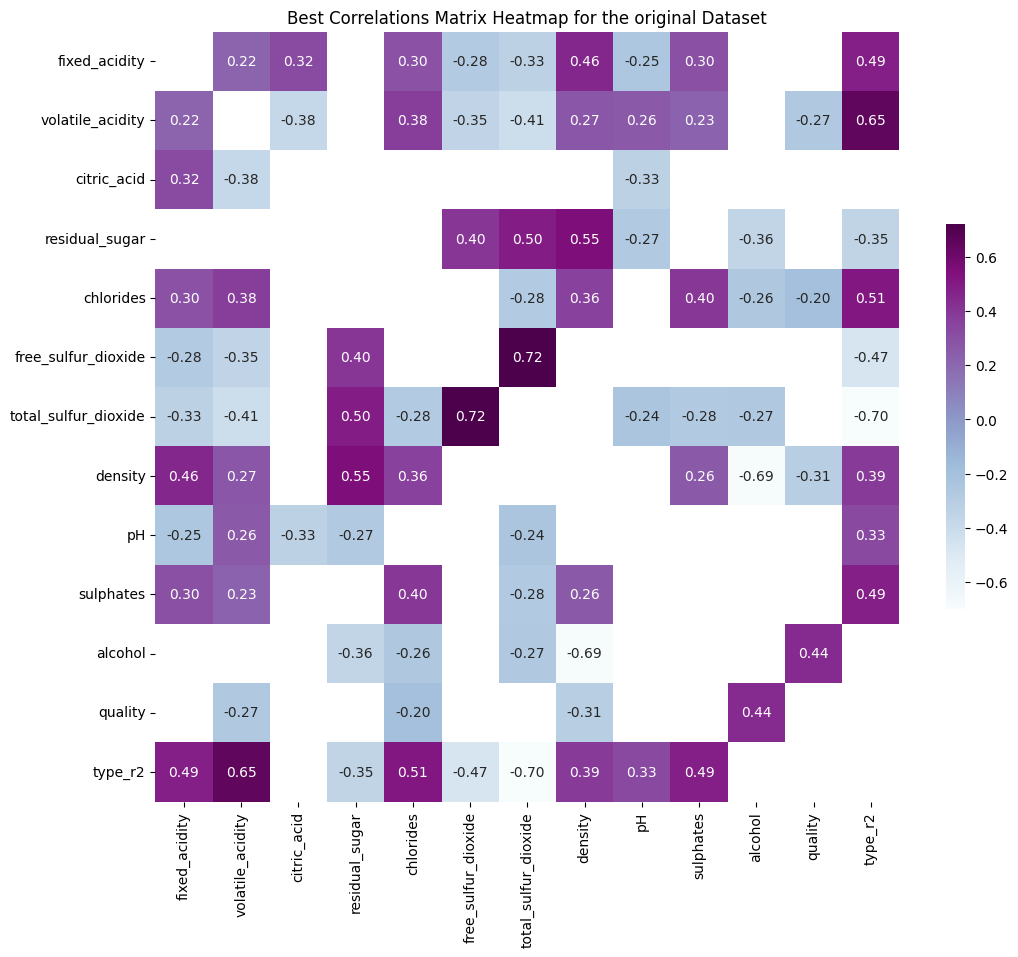

In [7]:
correlation_matrix = df_orig.corr()

filtered_corr = correlation_matrix[(correlation_matrix > 0.2) | (correlation_matrix < -0.2)]

for i in range(len(filtered_corr)):
    filtered_corr.iloc[i, i] = np.nan

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='BuPu', cbar_kws={"shrink": .5})
plt.title('Best Correlations Matrix Heatmap for the original Dataset')
plt.show()

In [8]:
df_orig.corr()[['quality']].sort_values(by='quality', ascending = False)

quality
quality               1.000000
alcohol               0.444319
citric_acid           0.085532
free_sulfur_dioxide   0.055463
sulphates             0.038485
pH                    0.019506
residual_sugar       -0.036980
total_sulfur_dioxide -0.041385
fixed_acidity        -0.076743
type_r2              -0.119323
chlorides            -0.200666
volatile_acidity     -0.265699
density              -0.305858

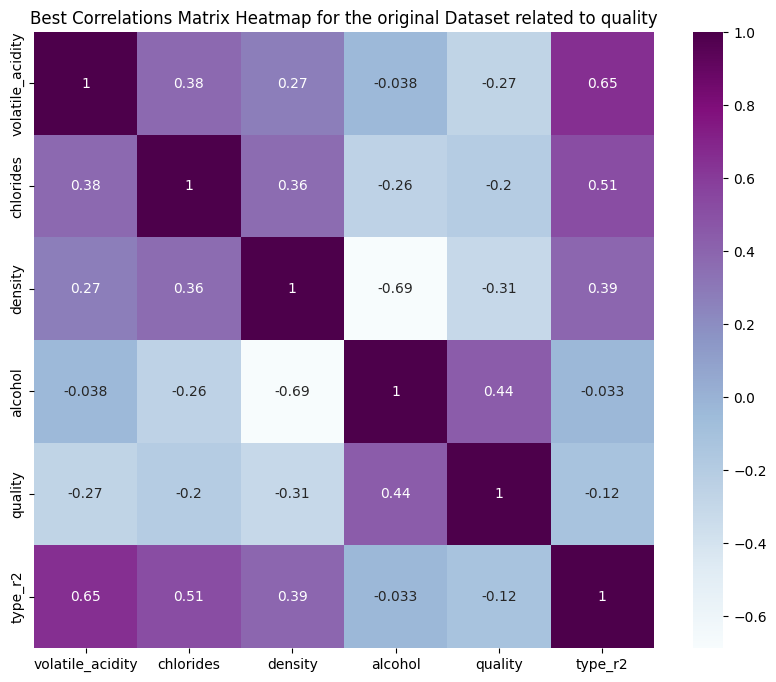

In [9]:
df_quality_eff = df_orig.drop(['citric_acid', 'free_sulfur_dioxide', 'sulphates','pH','residual_sugar','total_sulfur_dioxide','fixed_acidity'], axis=1)
plt.figure(figsize=(10,8))
plt.title('Best Correlations Matrix Heatmap for the original Dataset related to quality')
sns.heatmap(df_quality_eff.corr(),vmax=1.0,  annot=True,  cmap="BuPu")
plt.show()

### Data Balancing:

In [10]:
df_orig['type_r2'].value_counts() # 0 - White wine,  1 -  Red wine

type_r2
0    4898
1    1599
Name: count, dtype: int64

In [11]:
# Separating the dataset into majority and minority classes
majority_class = df_orig[df_orig['type_r2'] == 0]
minority_class = df_orig[df_orig['type_r2'] == 1]

# Undersampling the majority class
majority_class_undersampled = resample(majority_class, 
                                       replace=False, 
                                       n_samples=len(minority_class), # to match minority class
                                       random_state=123) # reproducible results

# Combining the minority class with the undersampled majority class
balanced_data = pd.concat([majority_class_undersampled, minority_class])

# Applying SMOTE for oversampling the minority class in the balanced dataset
smote = SMOTE(random_state=123)
X = balanced_data.drop('type_r2', axis=1)
y = balanced_data['type_r2']
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a new balanced DataFrame
balanced_data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data_resampled['type_r2'] = y_resampled

balanced_distribution = balanced_data_resampled['type_r2'].value_counts()
balanced_distribution

type_r2
0    1599
1    1599
Name: count, dtype: int64

In [12]:
df_orig[df_orig['quality'] == 8]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  type_r2
17              6.2              0.66         0.48             1.2      0.029                 29.0                  75.0  0.98920  3.33       0.39     12.8        8        0
20              6.2              0.66         0.48             1.2      0.029                 29.0                  75.0  0.98920  3.33       0.39     12.8        8        0
22              6.8              0.26         0.42             1.7      0.049                 41.0                 122.0  0.99300  3.47       0.48     10.5        8        0
68              6.7              0.23         0.31             2.1      0.046                 30.0                  96.0  0.99260  3.33       0.64     10.7        8        0
74              6.7              0.23         0.31             2.1      0.046                 30.0                  96.0  0.99260  3.33       0.64     10.7        8        0
...             ...               ...          ...             ...        ...                  ...                   ...      ...   ...        ...      ...      ...      ...
6100            8.6              0.42         0.39             1.8      0.068                  6.0                  12.0  0.99516  3.35       0.69     11.7        8        1
6167            5.5              0.49         0.03             1.8      0.044                 28.0                  87.0  0.99080  3.50       0.82     14.0        8        1
6301            7.2              0.33         0.33             1.7      0.061                  3.0                  13.0  0.99600  3.23       1.10     10.0        8        1
6347            7.2              0.38         0.31             2.0      0.056                 15.0                  29.0  0.99472  3.23       0.76     11.3        8        1
6447            7.4              0.36         0.30             1.8      0.074                 17.0                  24.0  0.99419  3.24       0.70     11.4        8        1

[193 rows x 13 columns]

### DATA MODELING and Evaluation - **PREDICTING WITH ML ALGORITHMS**

In the modeling phase, the primary aim is to use machine learning algorithms for insightful analysis and predictions based on the datasets prepared in the preceding section. Six distinct algorithms have been chosen to suit both supervised and unsupervised learning scenarios. The central goal is not just to construct precise models but also to interpret and extract meaningful insights from their results. The subsequent sections intricately outline the precise methodologies, parameters, and evaluations carried out for each algorithm, establishing a solid foundation for a thorough comprehension of our modeling efforts.

From this point on, the datasets for evaluating machine learning models will be:
* df_orig 
* balanced_data_resampled
* df_quality_eff

#### Supervised Learning:

1. **Decision Tree:** Decision Trees aim to create a model that makes decisions based on the entropy criterion, a measure of impurity in the data.
    * **Parameters:** The entropy-based criterion (criterion="entropy")
    * **Insights:** Decision Trees are advantageous for interpretability, providing a clear decision-making structure based on input features.
2. **Multi-layer Perceptron (MLP):** MLP employs a neural network with multiple layers to capture intricate patterns and relationships in the data.
    * **Parameters:** Configured with three hidden layers, each containing 100 neurons, ReLU activation, Adam solver, and a set maximum number of 1000 iterations.
    * **Insights:** MLP is adept at capturing complex non-linear relationships, but parameter tuning may be crucial for optimal performance.
2. **k-Nearest Neighbors (k-NN):** k-NN classifies samples based on the majority class among their k-nearest neighbors in the feature space.
    * **Parameters:** The critical parameter is the number of neighbors (n_neighbors=10), influencing the model's sensitivity to local patterns.
    * **Insights:** k-NN is sensitive to local patterns and is effective when decision boundaries are non-linear and complex.

### **Common Elements**

* **Evaluation Metrics:** Performance is assessed using common metrics, including accuracy, precision, recall, and F1-score. These metrics provide a holistic view of the model's effectiveness.
* **Visualization:** Provide detailed visualizations such as confusion matrices, classification reports, and loss curves for MLP.

### **Considerations:**

* **Parameter Tuning:** Parameters such as the number of hidden layers and neurons in the MLP model and the number of neighbors in the k-NN model may require further experimentation to improve the model.

In [13]:
def plot_results_comparison(supervised_df, unsupervised_df, title):
    melted_supervised = pd.melt(supervised_df, id_vars=["Algorithm"], var_name="Metric", value_name="Score")
    melted_unsupervised = pd.melt(unsupervised_df, id_vars=["Algorithm"], var_name="Metric", value_name="Score")

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 5))
    fig.suptitle(title, fontsize=16)

    sns.barplot(x="Algorithm", y="Score", hue="Metric", data=melted_supervised, palette="pastel", ax=ax[0])
    ax[0].set_title('Supervised Models')
    ax[0].set_ylabel('Score')
    ax[0].legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

    sns.barplot(x="Algorithm", y="Score", hue="Metric", data=melted_unsupervised, palette="pastel", ax=ax[1])
    ax[1].set_title('Unsupervised Models')
    ax[1].set_ylabel('Score')
    ax[1].legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

In [14]:
class SupervisedModels:
    def __init__(self, data, type:str):
        self.data = data
        self.type = type
        self.results_df = pd.DataFrame(columns=["Algorithm", "Accuracy", "Precision", "Recall", "F1-Score"])
        
        
        self.root_marker = 'README.md'
        self.current_dir = Path.cwd()

        while not (self.current_dir / self.root_marker).exists() and self.current_dir != self.current_dir.parent:
             self.current_dir = self.current_dir.parent

        self.models_path = current_dir / 'models'
        
    def dataset_split(self):
        self.features = self.data.drop("quality", axis=1)
        self.target = self.data["quality"]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.features,
            self.target,
            stratify=self.target,
            test_size=0.3,
            random_state=777
        )
    
    # Decision Trees
    def decision_tree(self):
        decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", random_state=777)
        decision_tree_classifier.fit(self.X_train, self.y_train)
        
        predictions = decision_tree_classifier.predict(self.X_test)
        confusion = confusion_matrix(self.y_test, predictions)
        class_report = classification_report(self.y_test, predictions, digits=4, zero_division=0, output_dict=True)
        self.plot_confusion_matrix_and_report(confusion, pd.DataFrame(class_report).iloc[:-1, :].T, sorted(self.y_test.unique()), f"Decision Tree - {self.type}")
        self.append_to_results_df('Decision Tree', class_report)

        # Save the model using Pickle
        self.save_model(decision_tree_classifier, f'{self.models_path}/decision_tree_model_{self.type}.pkl')
        
    # Multi-layer Perceptron (MLP)
    def mlp(self, max_iter=1000):
        mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="relu", solver="adam", max_iter=max_iter, random_state=777)
        mlp_classifier.fit(self.X_train, self.y_train)
        
        loss_curve = mlp_classifier.loss_curve_
        predictions = mlp_classifier.predict(self.X_test)
        confusion = confusion_matrix(self.y_test, predictions)
        class_report = classification_report(self.y_test, predictions, digits=4, zero_division=0, output_dict=True)
        self.plot_confusion_matrix_report_and_loss(confusion, pd.DataFrame(class_report).iloc[:-1, :].T, loss_curve, sorted(self.y_test.unique()), f"Multi-layer Perceptron - {self.type}")
        self.append_to_results_df('Multi-layer Perceptron', class_report)

        # Save the model using Pickle
        self.save_model(mlp_classifier, f'{self.models_path}/mlp_model_{self.type}.pkl')
        
    # k-Nearest Neighbors (k-NN)
    def knn(self, n_neighbors=10):
        knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn_classifier.fit(self.X_train, self.y_train)
        
        predictions = knn_classifier.predict(self.X_test)
        confusion = confusion_matrix(self.y_test, predictions)
        class_report = classification_report(self.y_test, predictions, digits=4, zero_division=0, output_dict=True)
        self.plot_confusion_matrix_and_report(confusion, pd.DataFrame(class_report).iloc[:-1, :].T, sorted(self.y_test.unique()), f"k-Nearest Neighbors - {self.type}")
        self.append_to_results_df("k-Nearest Neighbors", class_report)

        # Save the model using Pickle
        self.save_model(knn_classifier, f'{self.models_path}/knn_model_{self.type}.pkl')

    # Save model method
    def save_model(self, model, filename):
        with open(filename, 'wb') as model_file:
            pickle.dump(model, model_file)
        print(f"Model saved as {filename}")

    def append_to_results_df(self, algorithm, class_report):
        accuracy = class_report["accuracy"]
        precision = class_report["weighted avg"]["precision"]
        recall = class_report["weighted avg"]["recall"]
        f1_score = class_report["weighted avg"]["f1-score"]
        self.results_df = pd.concat([self.results_df, pd.DataFrame([{
            'Algorithm': algorithm,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1_score
        }])], ignore_index=True)
        
    def plot_confusion_matrix_report_and_loss(self, cmatrix, report, loss, cat, title):
        fig, ax = plt.subplots(1, 3, figsize=(21, 5))
        fig.suptitle(title, fontsize=16)

        sns.heatmap(cmatrix / np.sum(cmatrix), xticklabels=cat, yticklabels=cat, annot=True, cmap="Blues", ax=ax[0], fmt=".2%", square=True)
        ax[0].set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label")

        sns.heatmap(report, annot=True, cmap="Blues", ax=ax[1], fmt=".2%", vmin=0, vmax=1)
        ax[1].set_title("Classification Report")

        sns.lineplot(loss, ax=ax[2])
        ax[2].set(title="Loss Curve", xlabel="Epochs", ylabel="Loss")

        plt.tight_layout()
        plt.show()
        
    def plot_confusion_matrix_and_report(self, cmatrix, report, cat, title):
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(title, fontsize=16)

        sns.heatmap(cmatrix / np.sum(cmatrix), xticklabels=cat, yticklabels=cat, annot=True, cmap="Blues", ax=ax[0], fmt=".2%", square=True)
        ax[0].set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label")

        sns.heatmap(report, annot=True, cmap="Blues", ax=ax[1], fmt=".2%", vmin=0, vmax=1)
        ax[1].set_title("Classification Report")

        plt.tight_layout()
        plt.show()


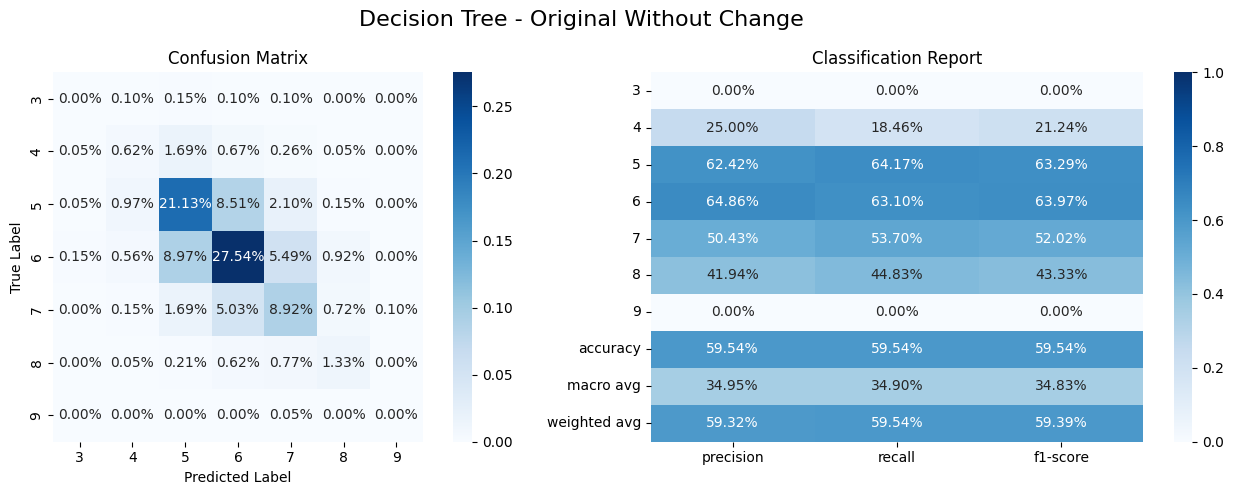

Model saved as /Users/mauurao/Desktop/wine-quality-prediction/models/decision_tree_model_Original Without Change.pkl


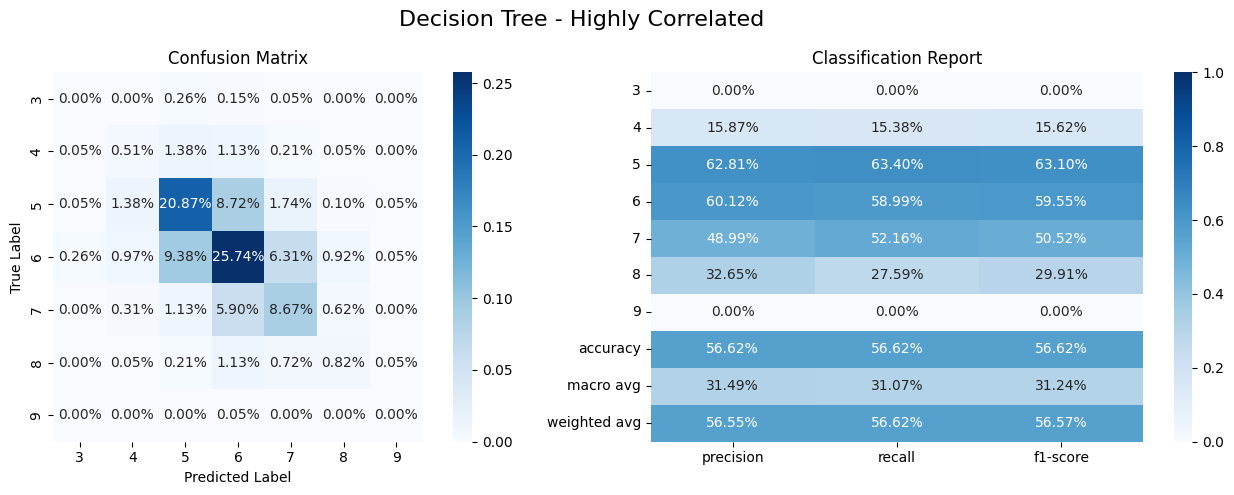

Model saved as /Users/mauurao/Desktop/wine-quality-prediction/models/decision_tree_model_Highly Correlated.pkl


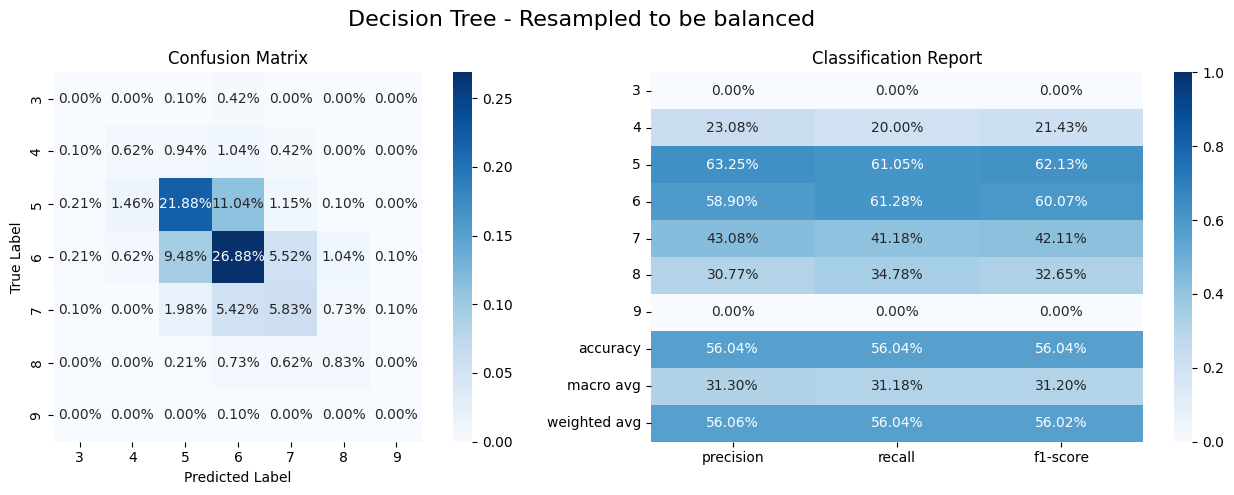

Model saved as /Users/mauurao/Desktop/wine-quality-prediction/models/decision_tree_model_Resampled to be balanced.pkl


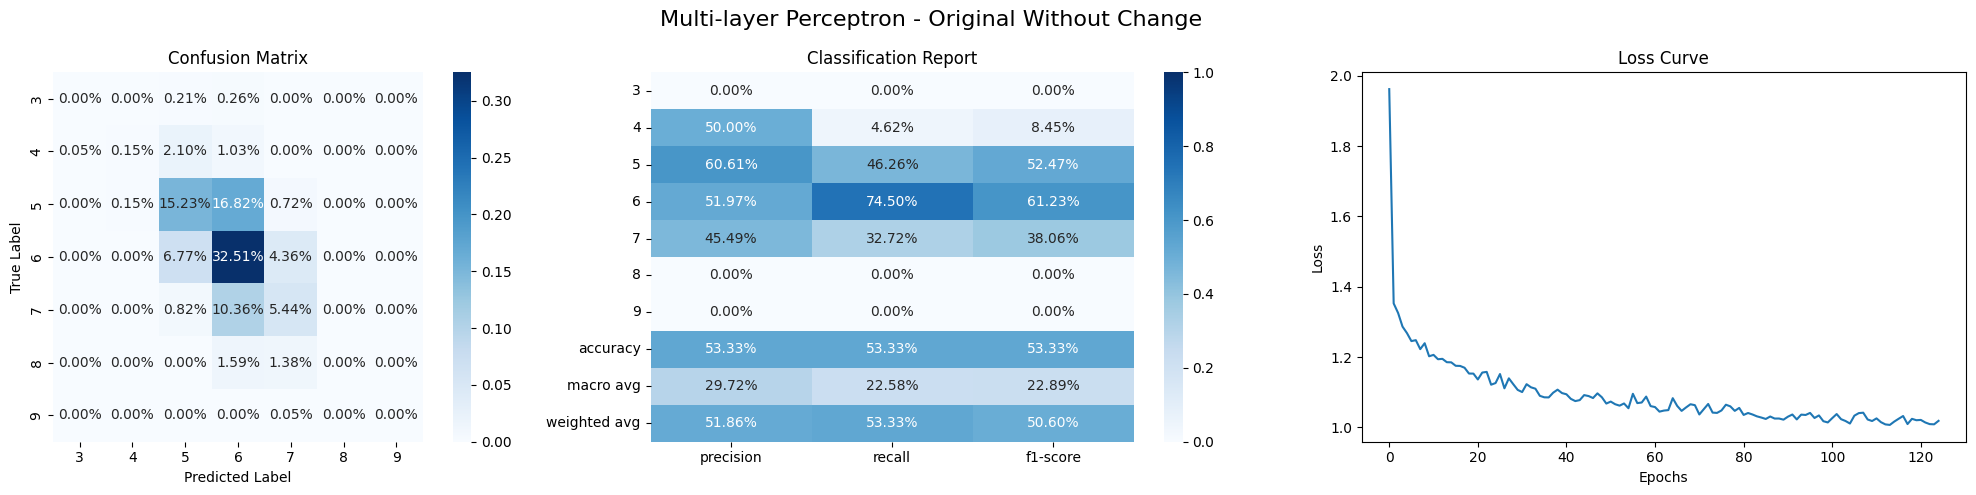

Model saved as /Users/mauurao/Desktop/wine-quality-prediction/models/mlp_model_Original Without Change.pkl


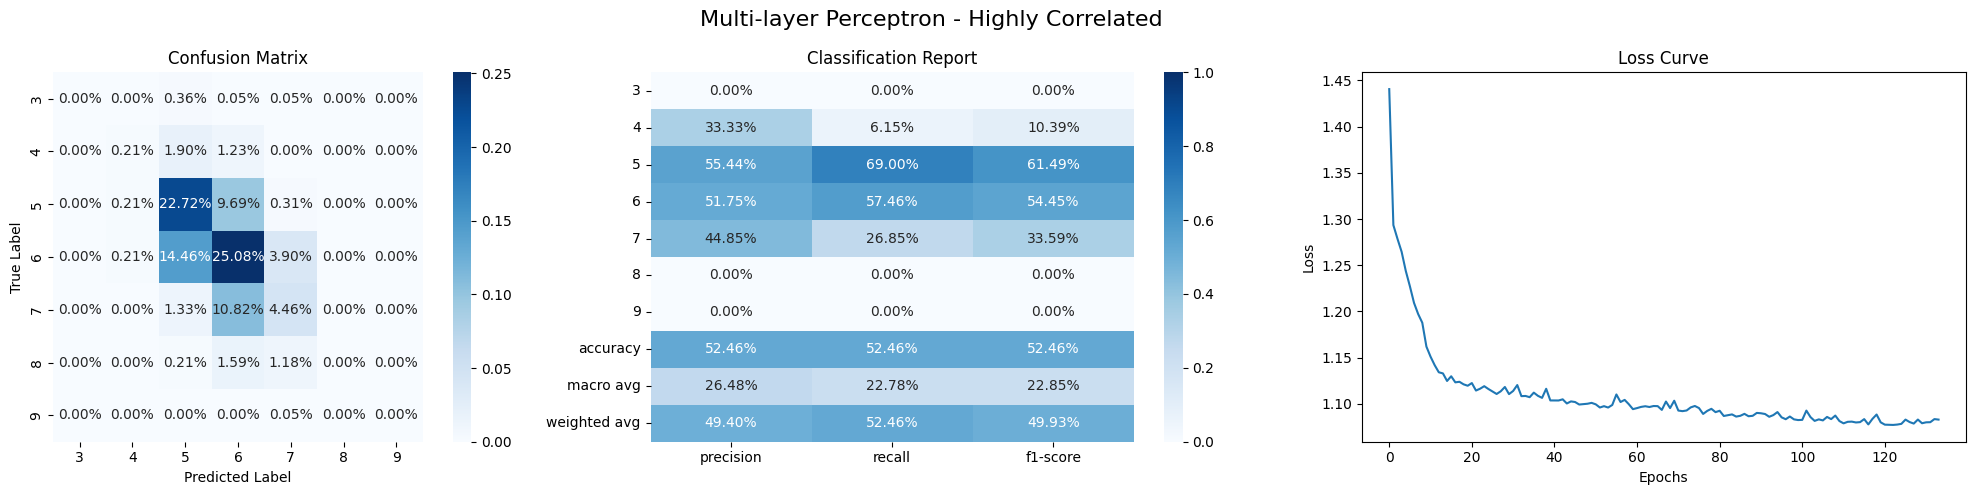

Model saved as /Users/mauurao/Desktop/wine-quality-prediction/models/mlp_model_Highly Correlated.pkl


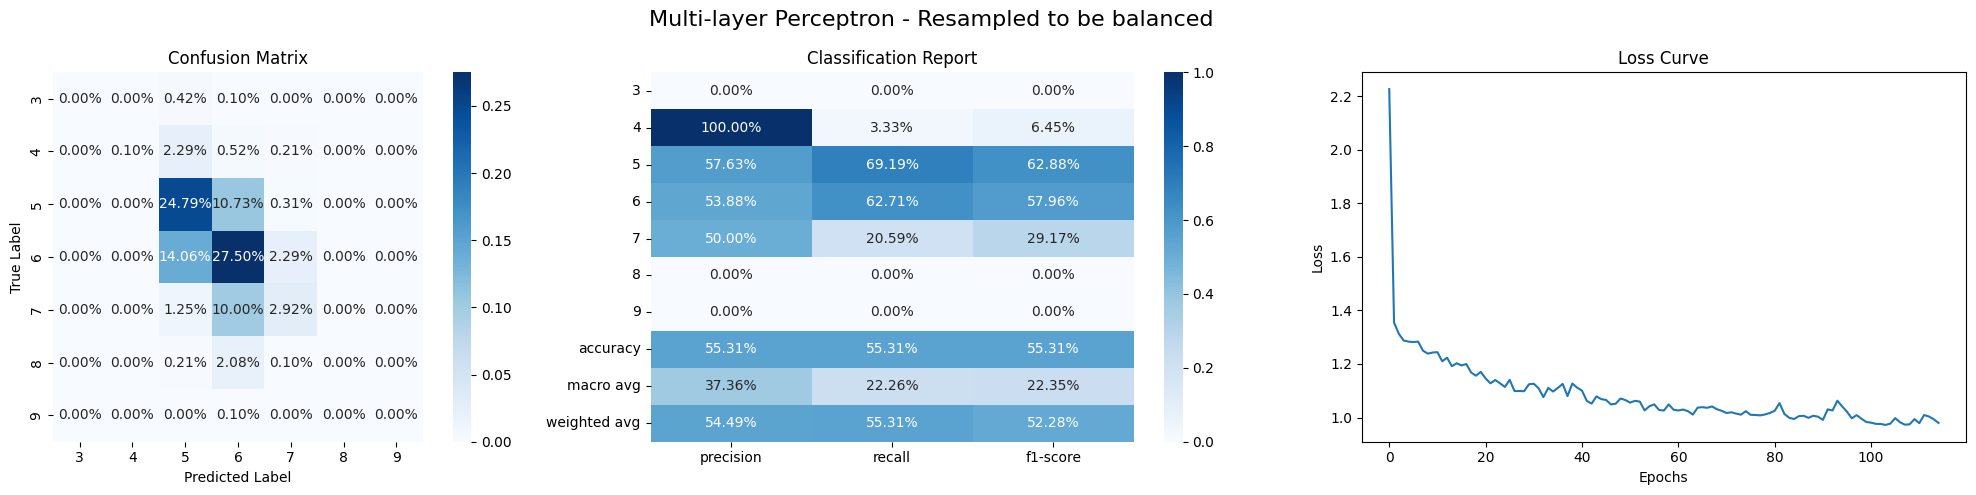

Model saved as /Users/mauurao/Desktop/wine-quality-prediction/models/mlp_model_Resampled to be balanced.pkl


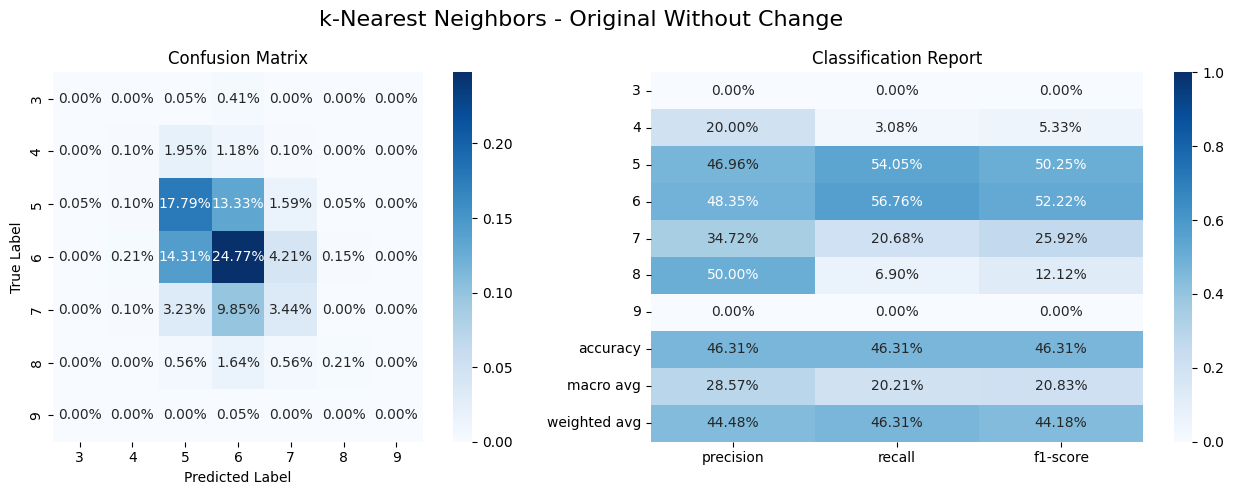

Model saved as /Users/mauurao/Desktop/wine-quality-prediction/models/knn_model_Original Without Change.pkl


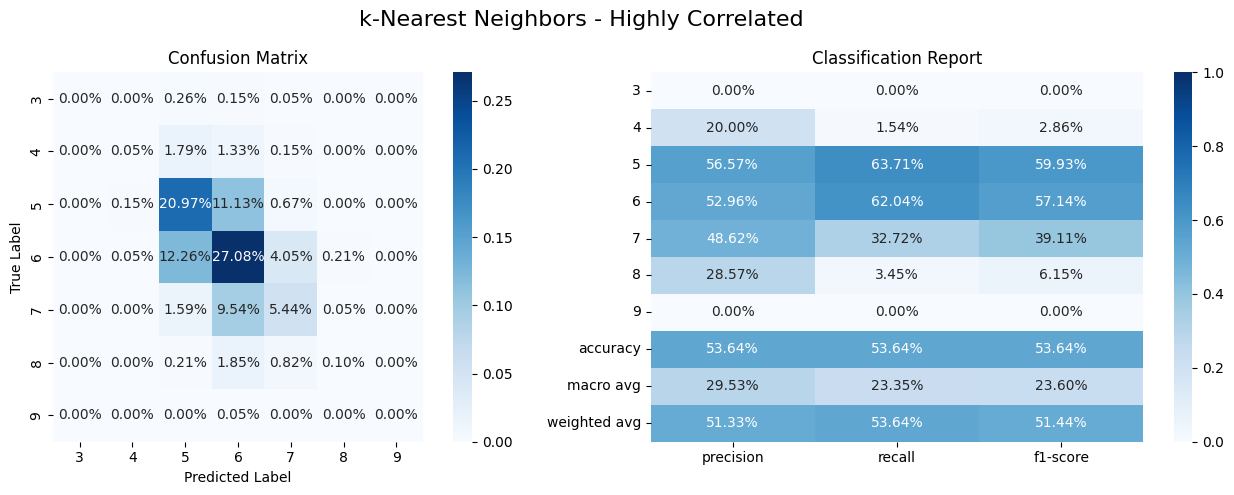

Model saved as /Users/mauurao/Desktop/wine-quality-prediction/models/knn_model_Highly Correlated.pkl


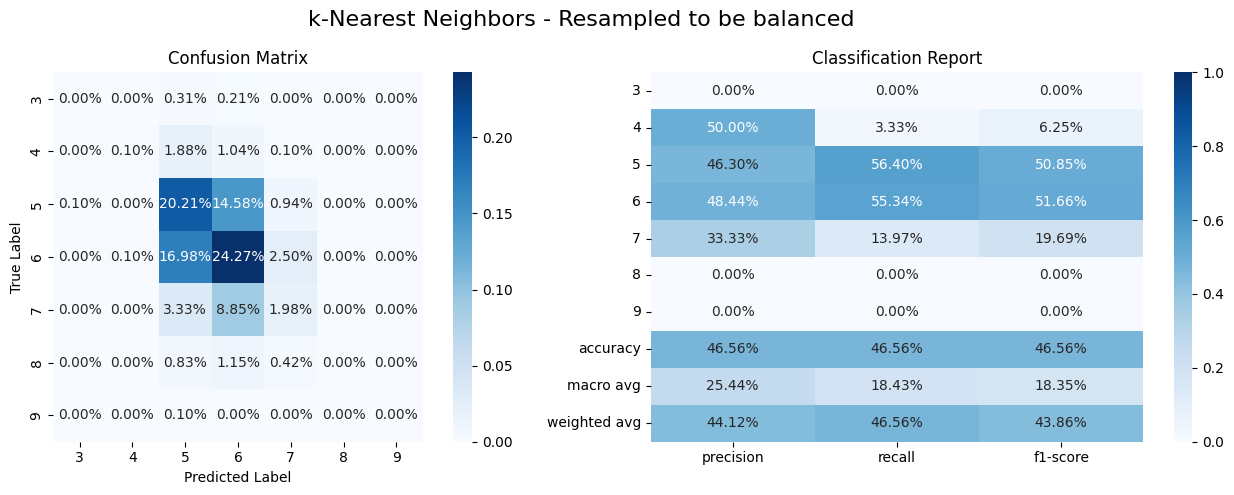

Model saved as /Users/mauurao/Desktop/wine-quality-prediction/models/knn_model_Resampled to be balanced.pkl


In [15]:
sup_df_orig = SupervisedModels(df_orig, 'Original Without Change')
sup_df_quality_eff = SupervisedModels(df_quality_eff, 'Highly Correlated')
sup_balanced_data_resampled = SupervisedModels(balanced_data_resampled, 'Resampled to be balanced')

sup_df_orig.dataset_split()
sup_df_quality_eff.dataset_split()
sup_balanced_data_resampled.dataset_split()

sup_df_orig.decision_tree()
sup_df_quality_eff.decision_tree()
sup_balanced_data_resampled.decision_tree()
sup_df_orig.mlp()
sup_df_quality_eff.mlp()
sup_balanced_data_resampled.mlp()
sup_df_orig.knn()
sup_df_quality_eff.knn()
sup_balanced_data_resampled.knn()

## **Unsupervised**

1. **k-Means Clustering:** k-Means partitions data into distinct groups based on feature similarity.
    * **Parameters:** The crucial parameter is the number of clusters (n_clusters), which is automatically set based on the unique target values.
    * **Insight:** K-Means is versatile but sensitive to the initial choice of centroids.

2. **DBScan Clustering:** DBScan clusters based on density, suitable for irregularly shaped clusters.
    * **Parameters:** Crucial parameters include the neighborhood distance (eps) and minimum samples for a core point (min_samples).
    * **Insight:** DBScan excels at handling varying cluster shapes and densities, and parameter tuning is essential for optimal results.

3. **Agglomerative Hierarchical Clustering (AHC):** AHC successively merges or splits clusters based on proximity.
    * **Parameters:** The number of clusters is automatically determined based on the unique target values.
    * **Insight:** AHC offers a hierarchical view of data structure, providing flexibility in cluster exploration.

### **Common Elements**

* **Evaluation Metrics:** V-measure, Adjusted Rand Index, and Adjusted Mutual Information. Higher values across these metrics indicate better clustering performance, capturing both homogeneity and completeness.
* **Visualization:** Results are visualized using t-Distributed Stochastic Neighbor Embedding (t-SNE) for a clear 2D representation of clusters and a bar chart with the evaluation metrics.

### **Considerations:**

* **Parameter Tuning:** DBScan parameters, such as eps and min_samples, demand careful tuning based on the dataset's density characteristics and may require further experimentation to improve the model.

In [16]:
class UnsupervisedModels:
  def __init__(self, data, type: str):
    
    self.data = data
    self.type = type
    self.results_df = pd.DataFrame(columns=["Algorithm", "V-measure", "Adjusted Rand Index", "Adjusted Mutual Info"])
    
  def dataset_split(self):
      self.features = self.data.drop("quality", axis=1)
      self.target = self.data["quality"]

      self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
          self.features,
          self.target,
          stratify=self.target,
          test_size=0.3,
          random_state=777
      )

  # k-Means
  def kmeans(self):
    kmeans_clustering = KMeans(n_clusters=len(self.target.unique()), n_init="auto", random_state=777)
    predictions = kmeans_clustering.fit_predict(self.features)

    tsne = TSNE(n_components=2, random_state=777)
    reduced_features = tsne.fit_transform(self.features)

    predicted_clusters = pd.DataFrame(reduced_features, columns=["X", "Y"])
    expected_clusters = pd.DataFrame(reduced_features, columns=["X", "Y"])

    predicted_clusters["Cluster"] = predictions
    expected_clusters["Cluster"] = self.target

    metrics = self.evaluate_cluster("k-Means", predictions)

    plot_cluster_result(predicted_clusters, expected_clusters, metrics, f"k-Means - {self.type}")

  # DBScan
  def dbscan(self, eps, min_sample):
    dbscan_clustering = DBSCAN(eps=eps, min_samples=min_sample)
    predictions = dbscan_clustering.fit_predict(self.features)

    tsne = TSNE(n_components=2, random_state=777)
    reduced_features = tsne.fit_transform(self.features)

    predicted_clusters = pd.DataFrame(reduced_features, columns=["X", "Y"])
    expected_clusters = pd.DataFrame(reduced_features, columns=["X", "Y"])

    predicted_clusters["Cluster"] = predictions
    expected_clusters["Cluster"] = self.target

    metrics = self.evaluate_cluster("DBScan", predictions)

    plot_cluster_result(predicted_clusters, expected_clusters, metrics, f"DBScan - {self.type}")
  
  # Agglomerative Hierarchical Clustering
  def ahc(self):
    ahc_clustering = AgglomerativeClustering(n_clusters=len(self.target.unique()))
    predictions = ahc_clustering.fit_predict(self.features)

    tsne = TSNE(n_components=2, random_state=777)
    reduced_features = tsne.fit_transform(self.features)

    predicted_clusters = pd.DataFrame(reduced_features, columns=["X", "Y"])
    expected_clusters = pd.DataFrame(reduced_features, columns=["X", "Y"])

    predicted_clusters["Cluster"] = predictions
    expected_clusters["Cluster"] = self.target

    metrics = self.evaluate_cluster("Agglomerative Hierarchical Clustering", predictions)

    plot_cluster_result(predicted_clusters, expected_clusters, metrics, f"Agglomerative Hierarchical Clustering - {self.type}")

  def evaluate_cluster(self, algorithm, predictions):
    v_measure = v_measure_score(self.target, predictions)
    adjusted_rand_index = adjusted_rand_score(self.target, predictions)
    adjusted_mutual_info = adjusted_mutual_info_score(self.target, predictions)

    print(self.type)
    print(f"V-measure: {v_measure}")
    print(f"Adjusted Rand Index: {adjusted_rand_index}")
    print(f"Adjusted mutual info: {adjusted_mutual_info}")

    metrics_df = pd.DataFrame({
      'Metric': ["V-measure", "Adjusted Rand Index", "Adjusted Mutual Info"],
      'Score': [v_measure, adjusted_rand_index, adjusted_mutual_info]
    })

    self.append_to_results_df(algorithm, v_measure, adjusted_rand_index, adjusted_mutual_info)

    return metrics_df
  
  def append_to_results_df(self, algorithm, v_measure, adjusted_rand_index, adjusted_mutual_info):
    self.results_df = pd.concat([self.results_df, pd.DataFrame([{
      "Algorithm": algorithm,
      "V-measure": v_measure,
      "Adjusted Rand Index": adjusted_rand_index,
      "Adjusted Mutual Info": adjusted_mutual_info
    }])], ignore_index=True)
    
def plot_cluster_result(result_clusters, expected_clusters, metrics, title):
  fig, ax = plt.subplots(1, 3, figsize=(21, 5))
  fig.suptitle(title, fontsize=16)

  sns.scatterplot(x='X', y='Y', hue='Cluster', data=result_clusters, ax=ax[0], palette='tab10')
  ax[0].set(title="Predicted Clusters", xlabel=None, ylabel=None)

  sns.scatterplot(x='X', y='Y', hue='Cluster', data=expected_clusters, ax=ax[1], palette='tab10')
  ax[1].set(title="Expected Clusters", xlabel=None, ylabel=None)

  sns.barplot(x='Metric', y='Score', data=metrics, ax=ax[2])
  ax[2].set(title="Cluster Metrics", xlabel=None, ylabel=None)
  
  plt.tight_layout()
  plt.show()
    
    
    

Original Without Change
V-measure: 0.01658979107719541
Adjusted Rand Index: 0.002443550233946886
Adjusted mutual info: 0.01479863056788788


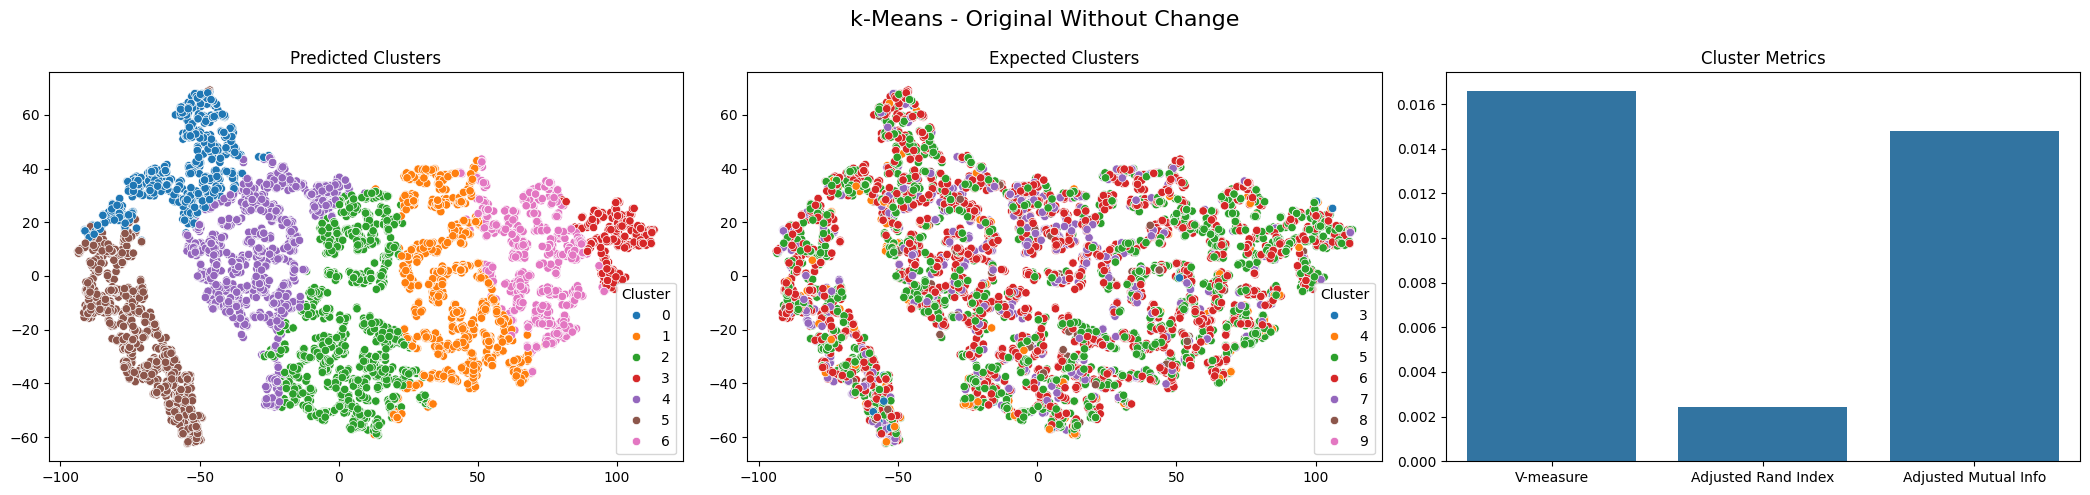

Highly Correlated
V-measure: 0.08990780445850766
Adjusted Rand Index: 0.05571619675042077
Adjusted mutual info: 0.08821882693701763


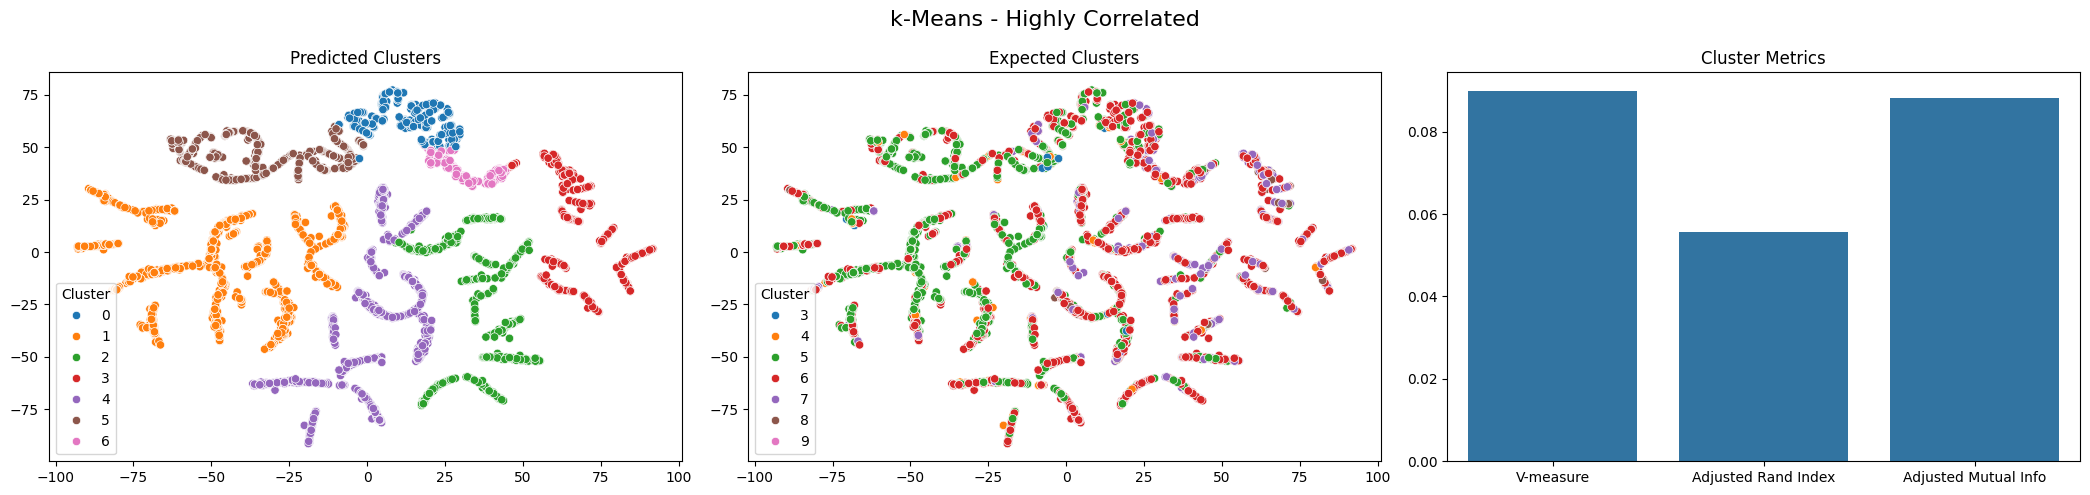

Resampled to be balanced
V-measure: 0.009408245026866605
Adjusted Rand Index: -0.0018963667975548755
Adjusted mutual info: 0.005684580928430225


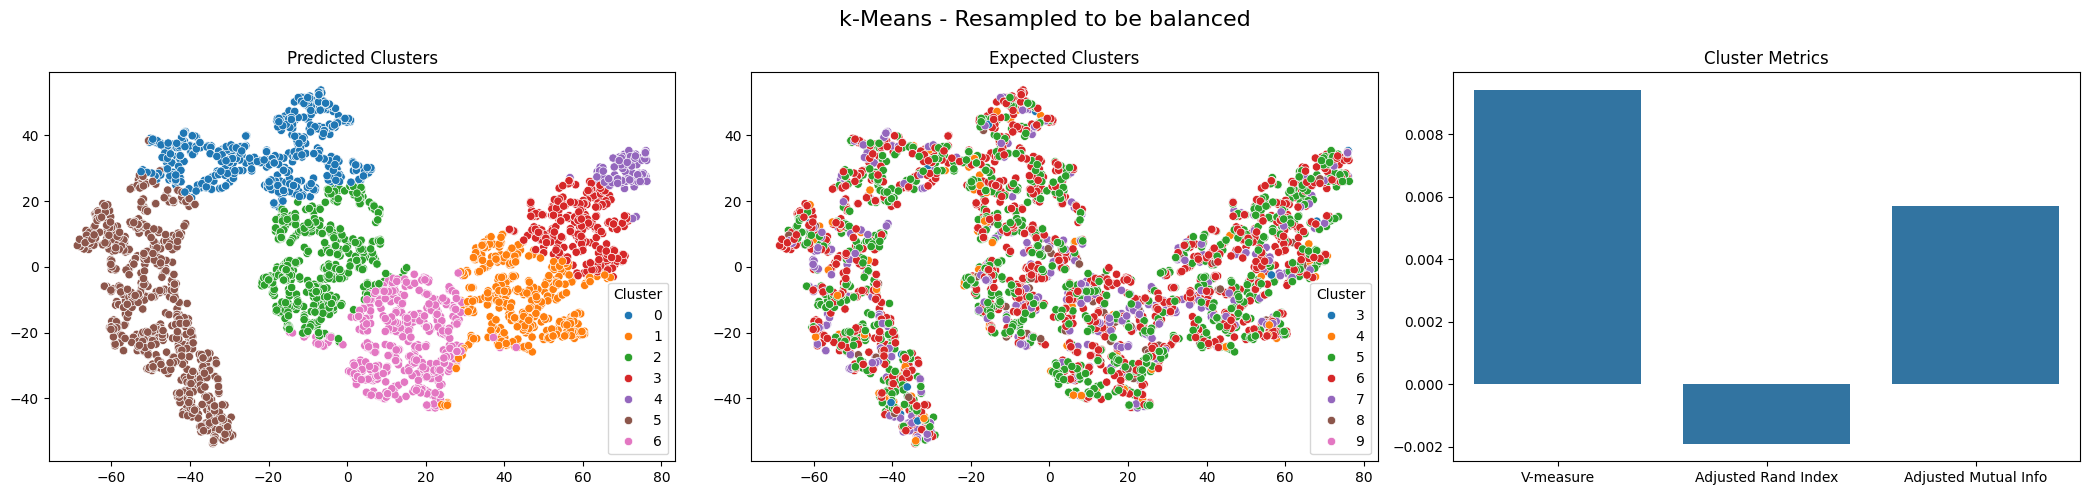

Original Without Change
V-measure: 0.00977623310932072
Adjusted Rand Index: -0.002434788248227271
Adjusted mutual info: 0.004722891751631055


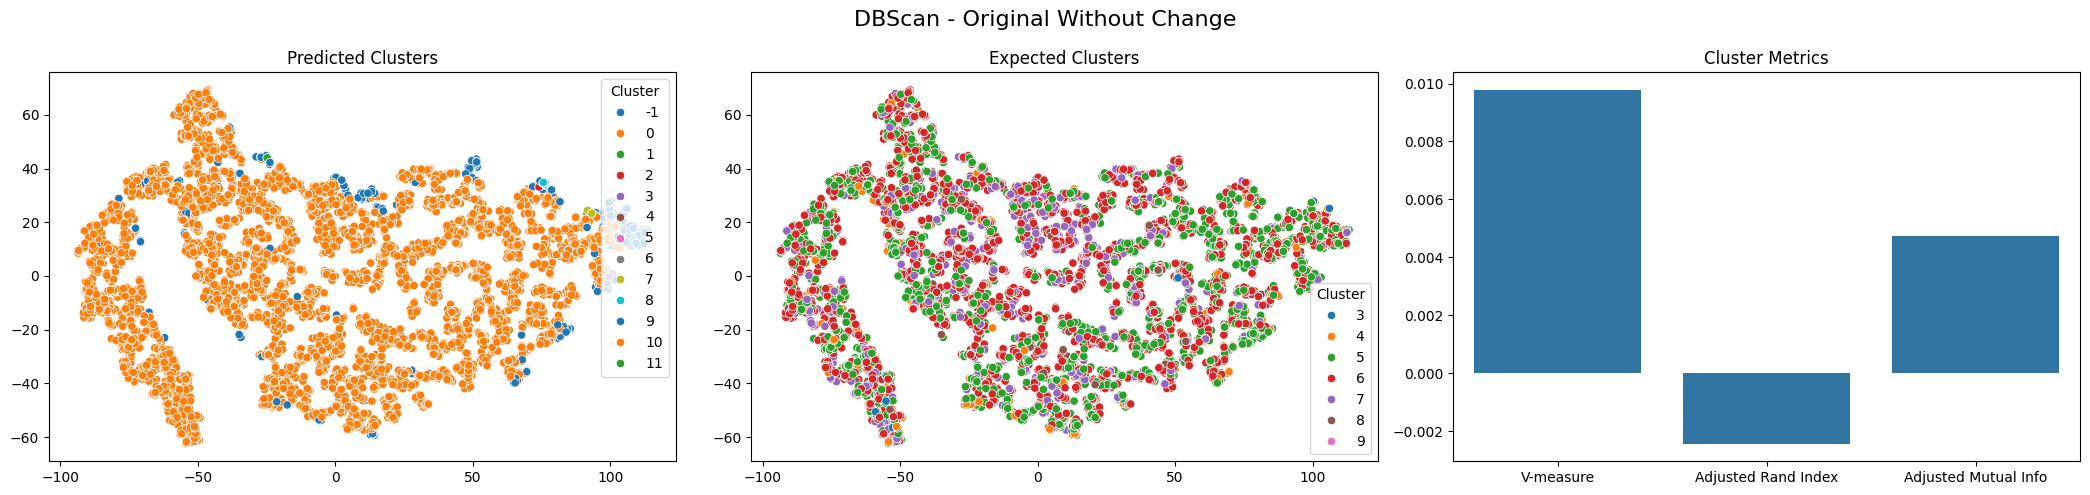

Highly Correlated
V-measure: 0.0
Adjusted Rand Index: 0.0
Adjusted mutual info: 0.0


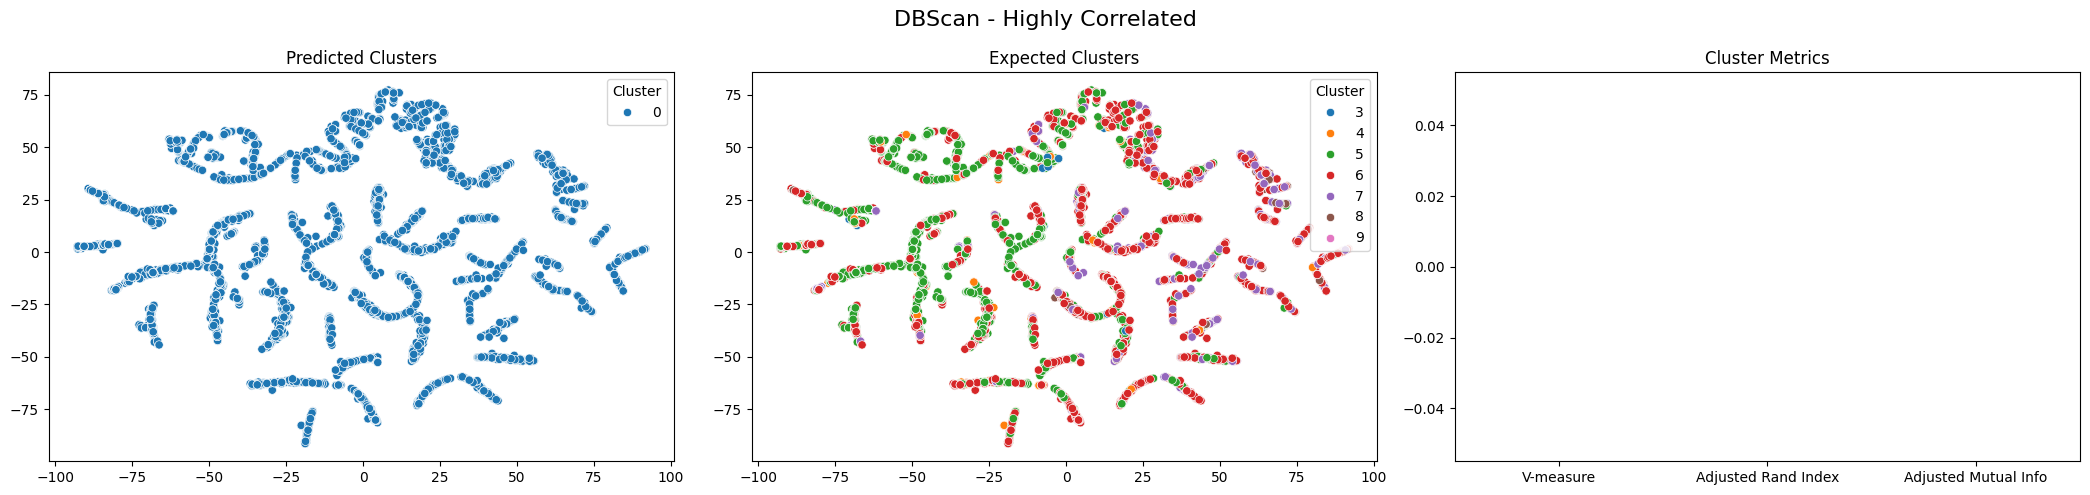

Resampled to be balanced
V-measure: 0.022158375601321674
Adjusted Rand Index: -0.0007080289368703301
Adjusted mutual info: 0.007828711030436399


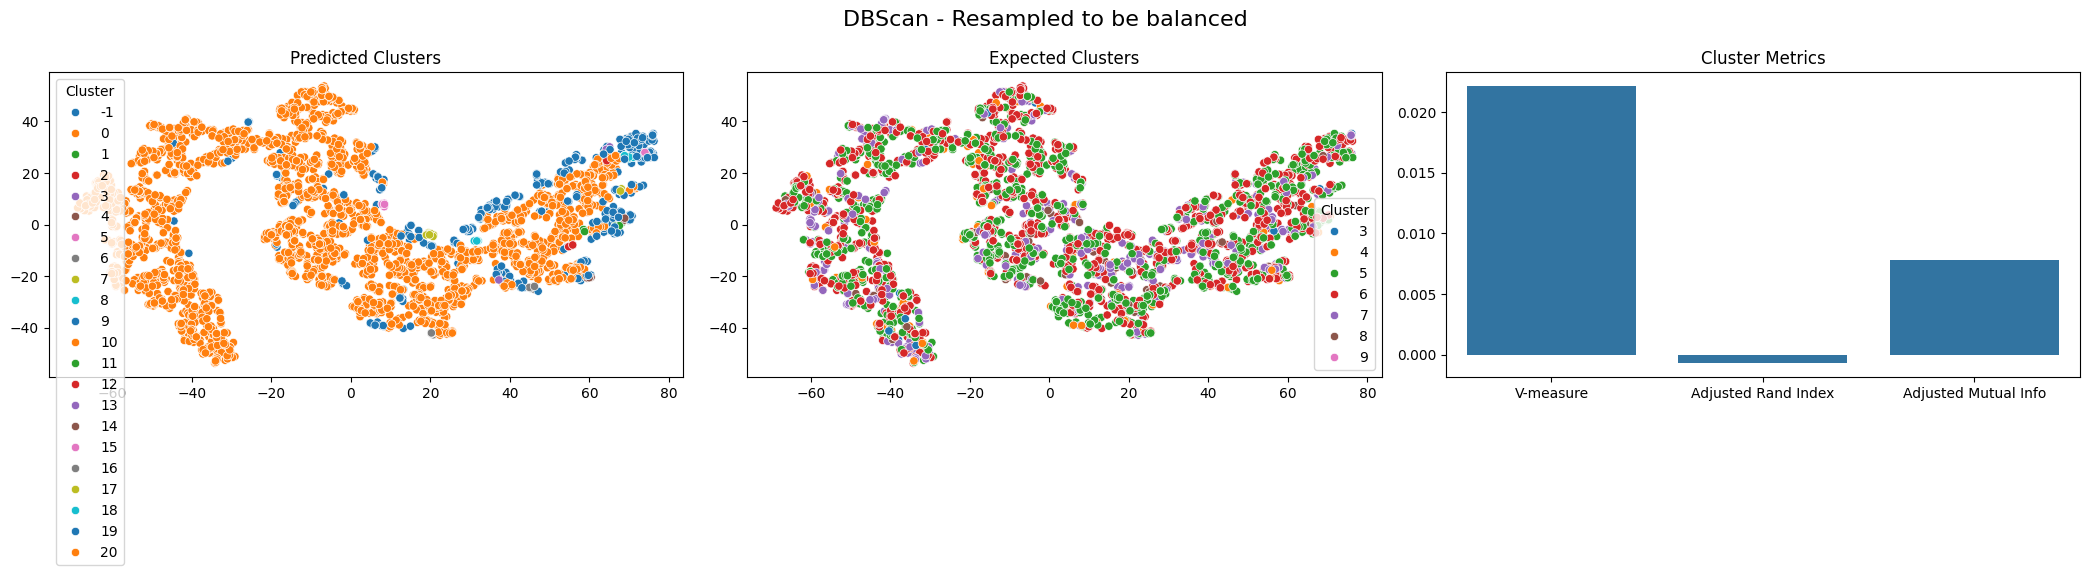

Original Without Change
V-measure: 0.016501711572930997
Adjusted Rand Index: 0.004107230802562574
Adjusted mutual info: 0.014722585167603244


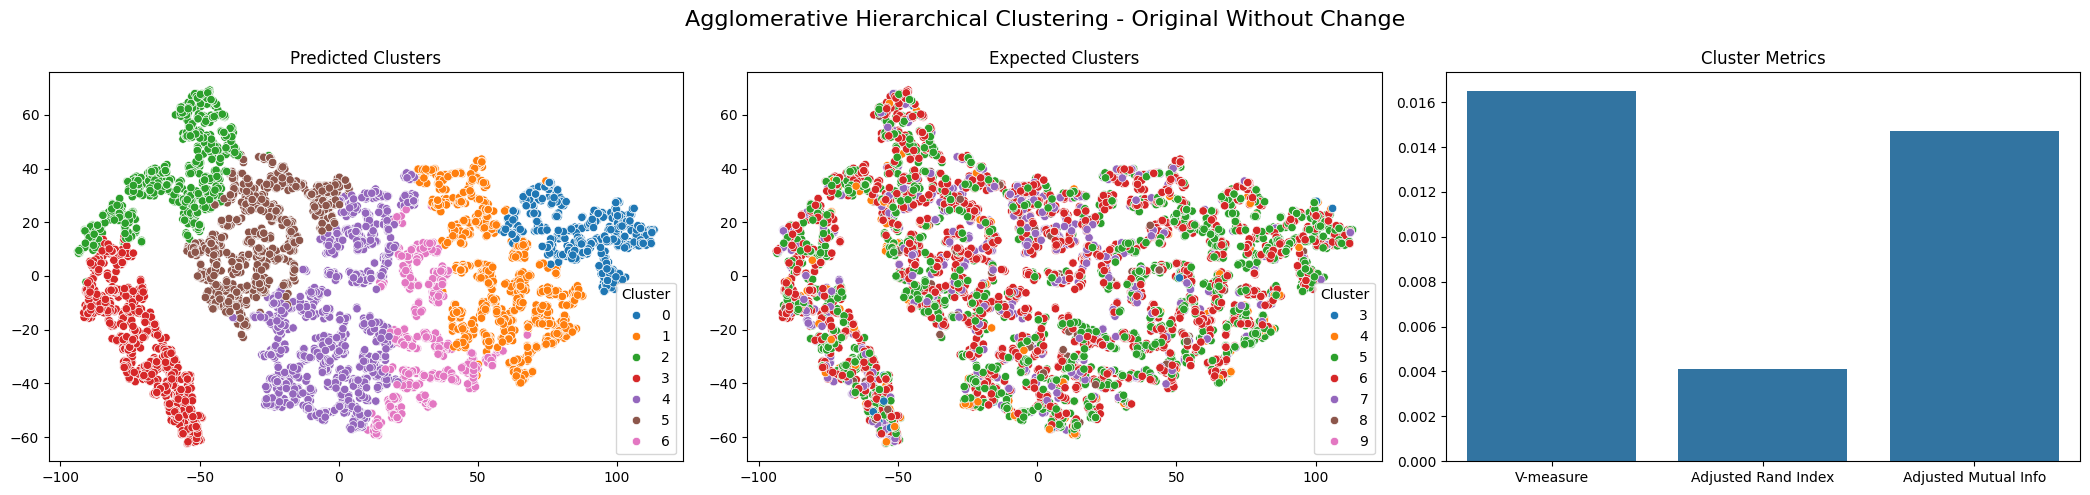

Highly Correlated
V-measure: 0.08680075759242926
Adjusted Rand Index: 0.05329770227866297
Adjusted mutual info: 0.08510796152794654


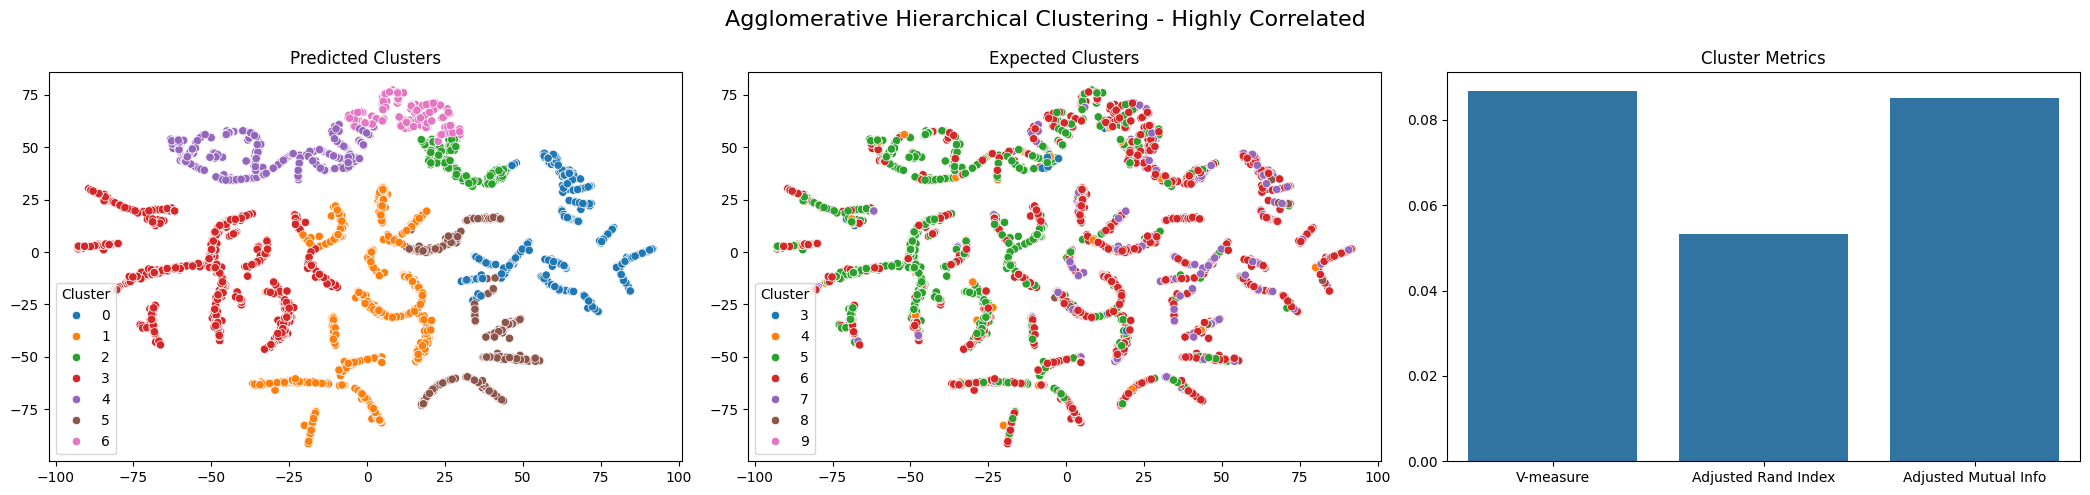

Resampled to be balanced
V-measure: 0.012051731908985223
Adjusted Rand Index: -0.0031686323496887157
Adjusted mutual info: 0.008278818116091538


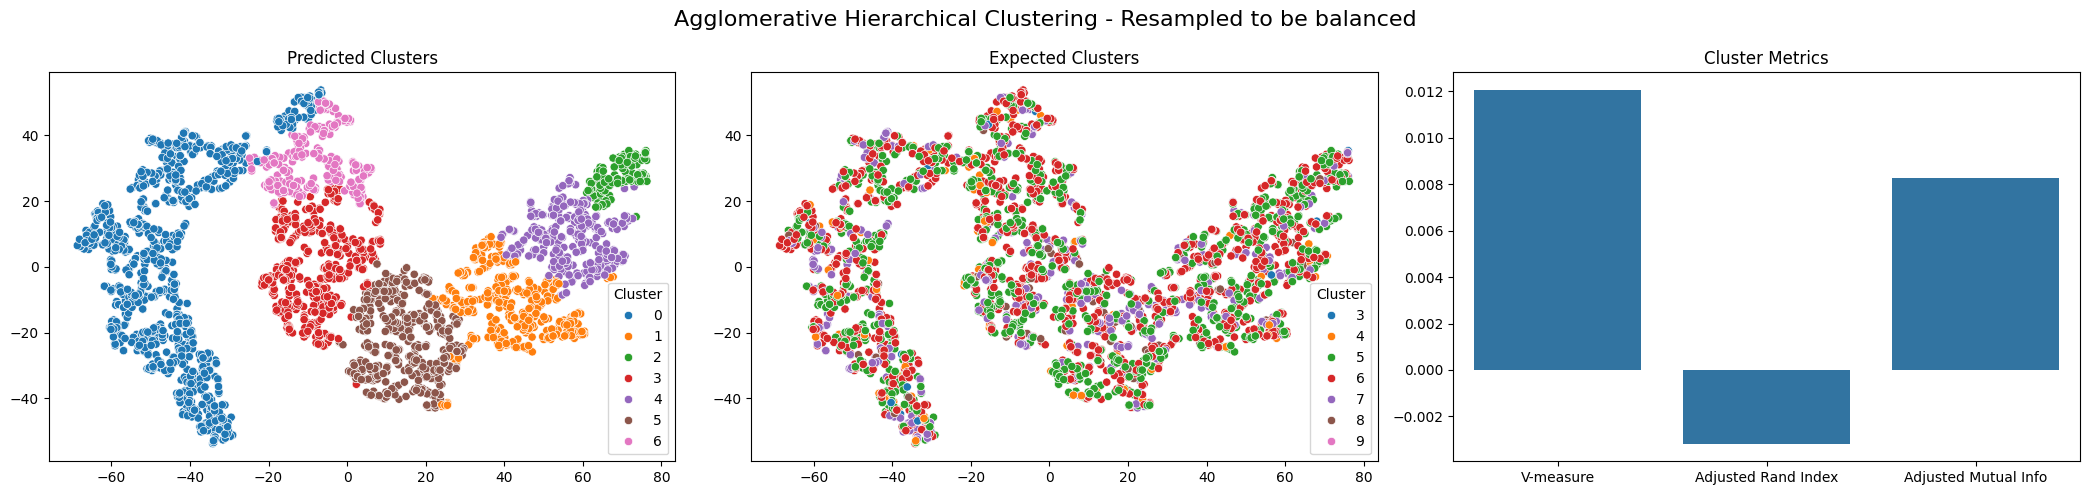

In [17]:
uns_df_orig = UnsupervisedModels(df_orig, 'Original Without Change')
uns_df_quality_eff = UnsupervisedModels(df_quality_eff, 'Highly Correlated')
uns_balanced_data_resampled = UnsupervisedModels(balanced_data_resampled, 'Resampled to be balanced')

uns_df_orig.dataset_split()
uns_df_quality_eff.dataset_split()
uns_balanced_data_resampled.dataset_split()

uns_df_orig.kmeans()
uns_df_quality_eff.kmeans()
uns_balanced_data_resampled.kmeans()
uns_df_orig.dbscan(5, 5)
uns_df_quality_eff.dbscan(5, 5)
uns_balanced_data_resampled.dbscan(5, 5)
uns_df_orig.ahc()
uns_df_quality_eff.ahc()
uns_balanced_data_resampled.ahc()

## **Evaluation** 
In this section, the focus shifts from model development to a comprehensive assessment of the models' performance. This critical step aims to validate the effectiveness of the chosen algorithms and methodologies. Through a systematic examination of both supervised and unsupervised models, we delve into a detailed analysis of metrics that span accuracy, precision, recall, F1-score, V-measure, Adjusted Rand Index, and Adjusted Mutual Information. By leveraging these metrics, we gain valuable insights into the strengths, weaknesses, and overall efficacy of our models, laying the foundation for informed decision-making and potential model refinement.

### **Supervised Metrics**

1. **Accuracy**
    * **Objective:** Measures the ratio of correctly predicted instances to the total instances.
    * **Advantages:** Simple and widely used.
    * **Disadvantages:** Can be misleading if the dataset is imbalanced.
    * **Interpretation:** Higher accuracy indicates better overall model performance.
2. **Precision**
    * **Objective:** Measures the accuracy of positive predictions.
    * **Advantages:** Useful when the cost of false positives is high.
    * **Disadvantages:** Ignores false negatives.
    * **Interpretation:** High precision indicates a low false positive rate.
3. **Recall**
    * **Objective:** Measures the ability to capture all relevant instances.
    * **Advantages:** Useful when the cost of false negatives is high.
    * **Disadvantages:** Ignores false positives.
    * **Interpretation:** High recall indicates a low false negative rate.
4. **F1-Score**
    * **Objective:** Harmonic mean of precision and recall.
    * **Advantages:** Balances precision and recall.
    * **Disadvantages:** Sensitive to imbalances between precision and recall.
    * **Interpretation:** High F1-score indicates a good balance between precision and recall.

### **Unsupervised Metrics:**

1. **V-measure**
    * **Objective:** Measures the balance between homogeneity and completeness in clustering.
    * **Advantages:** Reflects both precision and recall in clustering.
    * **Disadvantages:** Sensitive to imbalances between homogeneity and completeness.
    * **Interpretation:** Higher V-measure indicates better clustering performance.
2. **Adjusted Rand Index (ARI)**
    * **Objective:** Measures the similarity between true and predicted clusters.
    * **Advantages:** Adjusts for chance.
    * **Disadvantages:** Sensitive to the number of clusters.
    * **Interpretation:** ARI close to 1 indicates good cluster similarity.
3. **Adjusted Mutual Information**
    * **Objective:** Measures the agreement between true and predicted clusters.
    * **Advantages:** Adjusts for chance.
    * **Disadvantages:** Sensitive to the number of clusters.
    * **Interpretation:** Higher values indicate better cluster agreement.

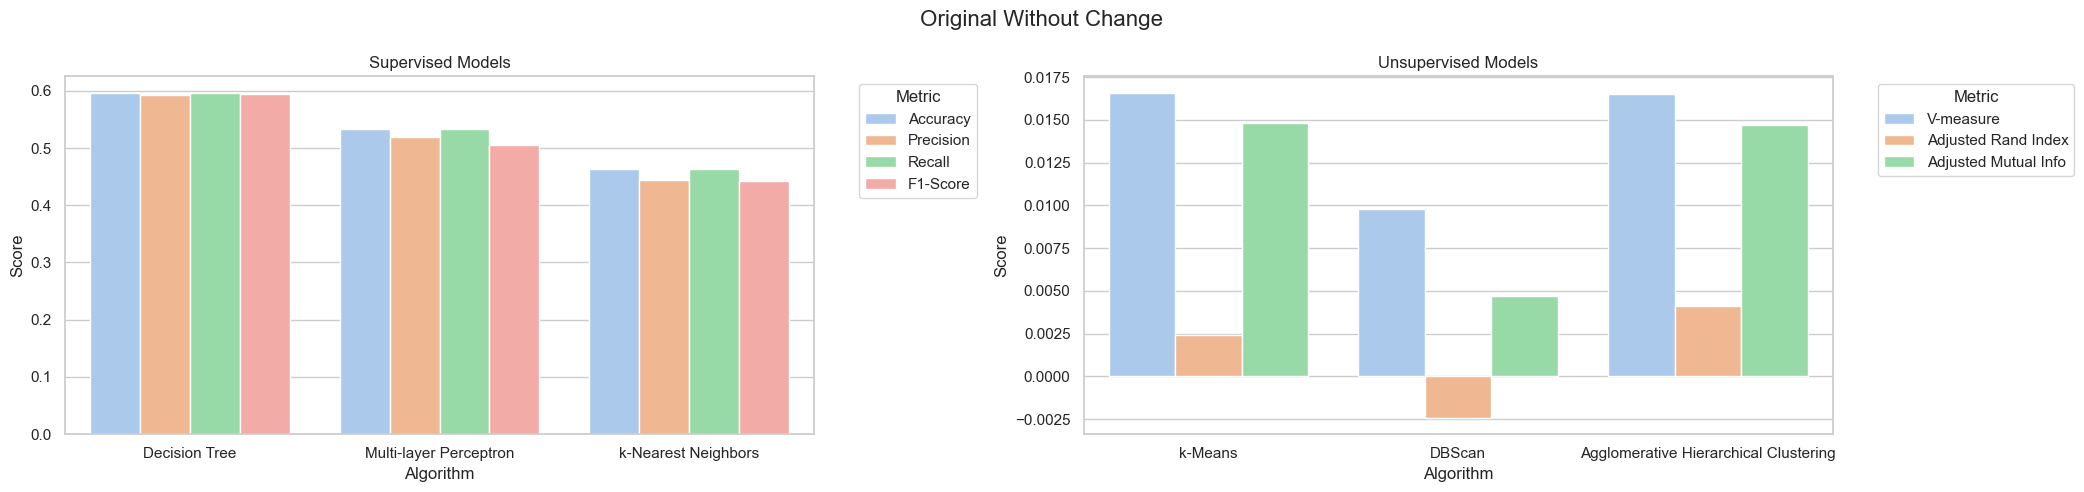

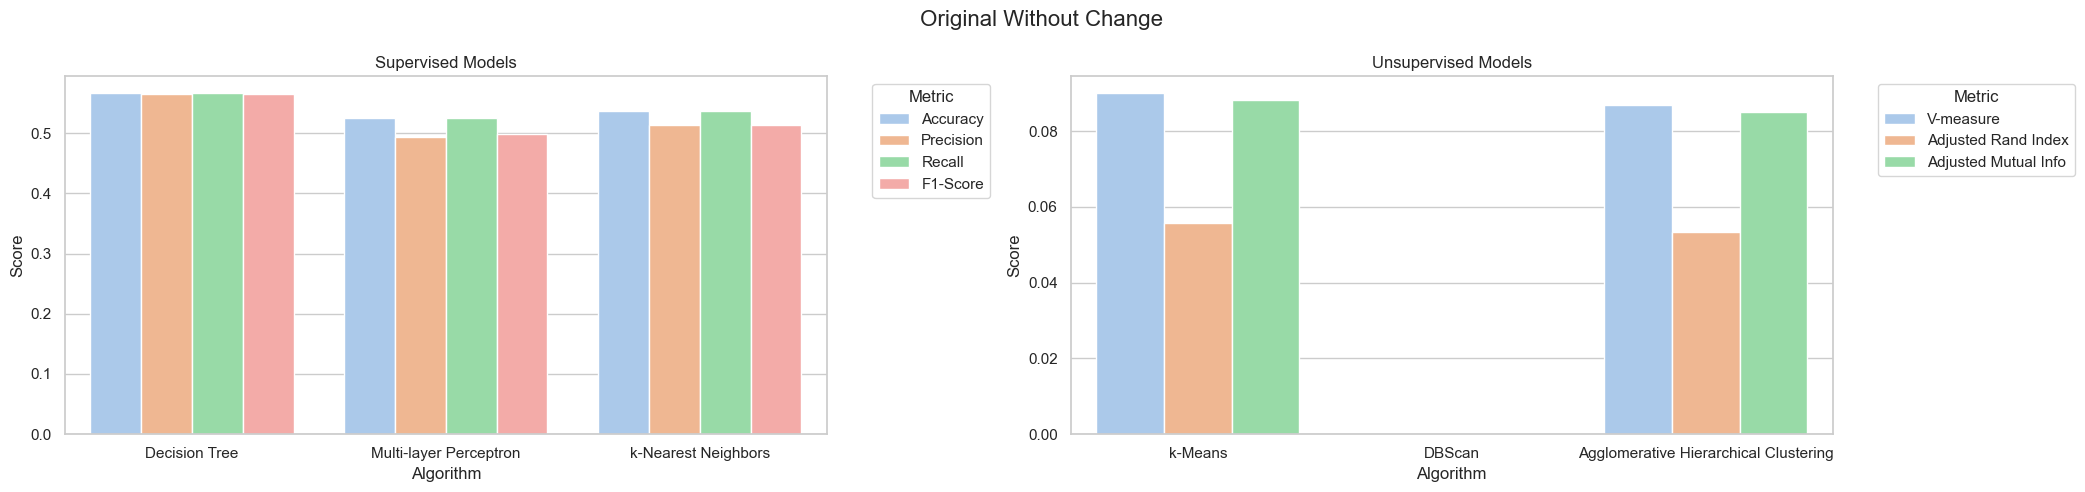

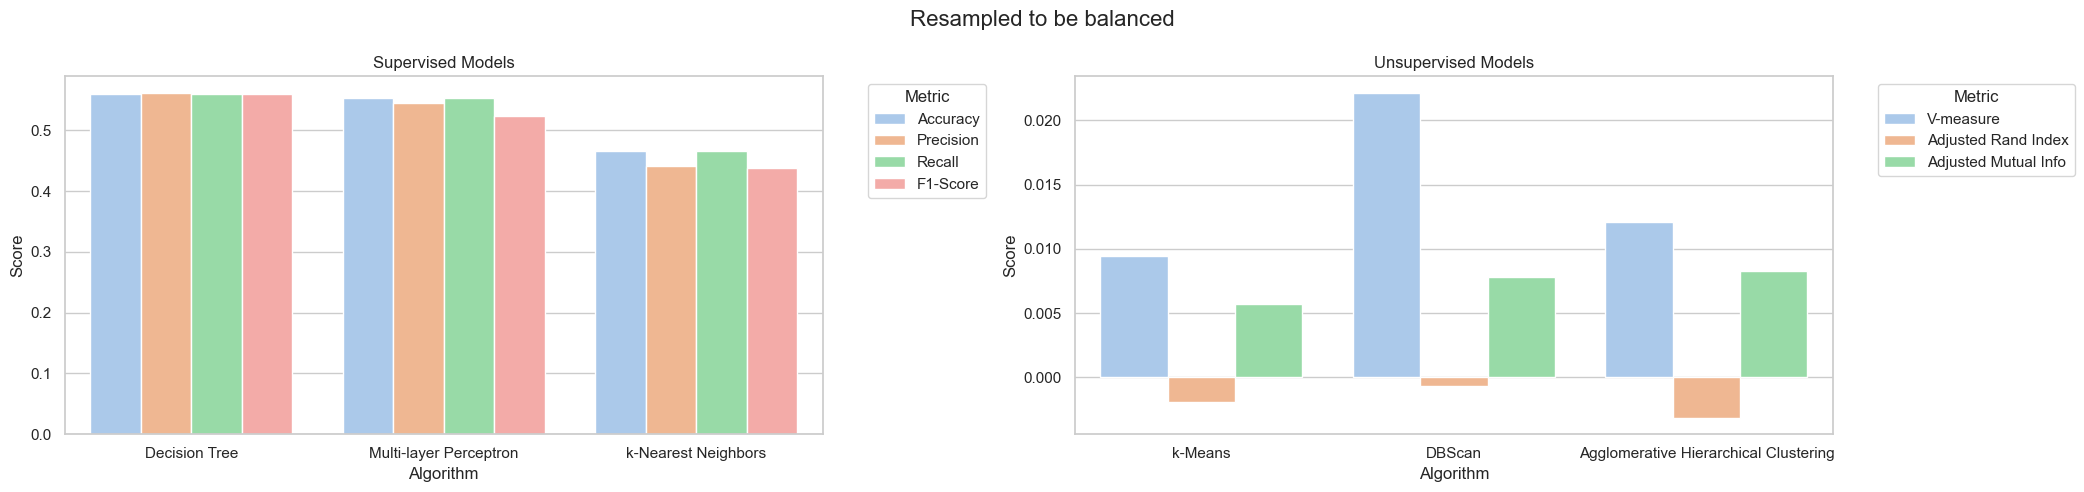

In [18]:
plot_results_comparison(sup_df_orig.results_df, uns_df_orig.results_df, sup_df_orig.type)
plot_results_comparison(sup_df_quality_eff.results_df, uns_df_quality_eff.results_df, sup_df_orig.type)
plot_results_comparison(sup_balanced_data_resampled.results_df, uns_balanced_data_resampled.results_df, sup_balanced_data_resampled.type)

## **Conclusions on Supervised Models:**

**Consistent Overall Performance:** <br>

The supervised models, such as Decision Tree, Multi-layer Perceptron, and k-Nearest Neighbors, exhibited relatively consistent performance in terms of accuracy, precision, recall, and F1-score. This suggests that these models are robust and provide a reliable basis for classifying wine quality.

Similar Accuracy Across Models: There is no significant difference among the supervised models tested. All of them seem to perform similarly across the evaluated metrics, indicating that different classification approaches can be applied to this problem with comparable efficiency.

## **Conclusions on Unsupervised Models:**
- **k-Means Stands Out:** Among the unsupervised models, the k-Means algorithm showed strong performance, especially in terms of V-measure and Adjusted Mutual Information, making it a good option for clustering the data.

- **DBScan Performance:** The DBScan algorithm, on the other hand, was less effective, particularly when compared to k-Means and Agglomerative Hierarchical Clustering. Its lower scores in V-measure and Adjusted Rand Index suggest that it may not be the best choice for this specific dataset.

- **Impact of Resampling:** The "Resampled to be balanced" image indicates that resampling the data can slightly improve the effectiveness of some unsupervised models, such as k-Means, though the change is not drastic. This suggests that the original dataset was already relatively well-balanced or that the impact of resampling is limited in this specific context.

##  **Final Considerations:**
The analysis suggests that while supervised models provide a solid foundation for predicting wine quality, unsupervised models like k-Means can be useful for identifying underlying patterns in the data. However, the choice of algorithm should consider the specific problem and data characteristics, with DBScan being less recommended for this case.